In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('sponsor.csv')
df.head()

,SponsorID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageID,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS,ROI
0,1005,Acme Inc.,Technology,Large,Title,SP1,Platinum,150000,"Branding, Advertising, Hospitality",Social Media,75000,2000000,50000,20000,1000,2000,500000,90,150000,120000,2,25
1,1006,Beta Corp.,Finance,Medium,Presenting,SP2,Gold,100000,"Branding, Hospitality",Email,50000,1000000,25000,10000,500,1000,250000,80,100000,80000,2,25
2,1007,Gamma LLC,Retail,Small,Supporting,SP3,Silver,50000,Branding,Print,25000,500000,12500,5000,250,500,125000,70,50000,40000,2,25
3,1008,Delta Enterprises,Healthcare,Large,Title,SP4,Platinum,200000,"Branding, Advertising, Hospitality, Workshops",Social Media,100000,3000000,75000,30000,1500,3000,750000,95,200000,160000,2,25
4,1009,Epsilon Industries,Manufacturing,Medium,Presenting,SP5,Gold,75000,"Branding, Sampling",Email,37500,750000,18750,7500,375,750,187500,75,75000,60000,2,25


In [3]:
df['SponsorID'] = df.reset_index().index + 1005
df

,SponsorID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageID,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS,ROI
0,1005,Acme Inc.,Technology,Large,Title,SP1,Platinum,150000,"Branding, Advertising, Hospitality",Social Media,75000,2000000,50000,20000,1000,2000,500000,90,150000,120000,2,25
1,1006,Beta Corp.,Finance,Medium,Presenting,SP2,Gold,100000,"Branding, Hospitality",Email,50000,1000000,25000,10000,500,1000,250000,80,100000,80000,2,25
2,1007,Gamma LLC,Retail,Small,Supporting,SP3,Silver,50000,Branding,Print,25000,500000,12500,5000,250,500,125000,70,50000,40000,2,25
3,1008,Delta Enterprises,Healthcare,Large,Title,SP4,Platinum,200000,"Branding, Advertising, Hospitality, Workshops",Social Media,100000,3000000,75000,30000,1500,3000,750000,95,200000,160000,2,25
4,1009,Epsilon Industries,Manufacturing,Medium,Presenting,SP5,Gold,75000,"Branding, Sampling",Email,37500,750000,18750,7500,375,750,187500,75,75000,60000,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1602,Radiant Ventures,Technology,Medium,Presenting,SP601,Gold,4300000,"Branding, Advertising, Sampling, Workshops",Radio,2150000,43000000,1075000,430000,21500,43000,10750000,85,4300000,3440000,2,25
598,1603,Sirius Enterprises,Telecommunications,Small,Supporting,SP602,Silver,3300000,"Branding, Sampling",Social Media,1650000,33000000,825000,330000,16500,33000,8250000,75,3300000,2640000,2,25
599,1604,Twilight Industries,Finance,Large,Title,SP603,Diamond,19500000,"Branding, Advertising, Hospitality",TV,9750000,325000000,8125000,3250000,162500,325000,81250000,95,19500000,15600000,2,25
600,1605,Ultraviolet Technologies,Retail,Medium,Presenting,SP604,Platinum,6250000,"Branding, Hospitality, Workshops",Online,3125000,62500000,1562500,625000,31250,62500,15625000,85,6250000,5000000,2,25


In [4]:
import random

# Generate random values for ROI
df['ROI'] = [random.randint(1, 25) for _ in range(len(df))]

# Print the updated DataFrame
print(df)


     SponsorID               SponsorName     SponsorIndustry SponsorSize  \
0         1005                 Acme Inc.          Technology       Large   
1         1006                Beta Corp.             Finance      Medium   
2         1007                 Gamma LLC              Retail       Small   
3         1008         Delta Enterprises          Healthcare       Large   
4         1009        Epsilon Industries       Manufacturing      Medium   
..         ...                       ...                 ...         ...   
597       1602          Radiant Ventures          Technology      Medium   
598       1603        Sirius Enterprises  Telecommunications       Small   
599       1604       Twilight Industries             Finance       Large   
600       1605  Ultraviolet Technologies              Retail      Medium   
601       1606          Volt Enterprises              Energy       Small   

    SponsorType SponsorshipPackageID SponsorshipPackageName  \
0         Title         

In [5]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features.remove('SponsorID')
numerical_features

['AdvertisingSpend',
 'Impressions',
 'Clicks',
 'Engagement',
 'BrandExposure',
 'AttendeeEngagement',
 'BrandAwarenessMetrics',
 'SponsorshipRevenue',
 'SponsorshipCosts',
 'ROAS',
 'ROI']

In [6]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 ]
discrete_feature

['BrandAwarenessMetrics', 'ROAS']

In [7]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['EventID']]
continuous_feature

['AdvertisingSpend',
 'Impressions',
 'Clicks',
 'Engagement',
 'BrandExposure',
 'AttendeeEngagement',
 'SponsorshipRevenue',
 'SponsorshipCosts',
 'ROI']

In [8]:
df

,SponsorID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageID,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS,ROI
0,1005,Acme Inc.,Technology,Large,Title,SP1,Platinum,150000,"Branding, Advertising, Hospitality",Social Media,75000,2000000,50000,20000,1000,2000,500000,90,150000,120000,2,21
1,1006,Beta Corp.,Finance,Medium,Presenting,SP2,Gold,100000,"Branding, Hospitality",Email,50000,1000000,25000,10000,500,1000,250000,80,100000,80000,2,19
2,1007,Gamma LLC,Retail,Small,Supporting,SP3,Silver,50000,Branding,Print,25000,500000,12500,5000,250,500,125000,70,50000,40000,2,10
3,1008,Delta Enterprises,Healthcare,Large,Title,SP4,Platinum,200000,"Branding, Advertising, Hospitality, Workshops",Social Media,100000,3000000,75000,30000,1500,3000,750000,95,200000,160000,2,5
4,1009,Epsilon Industries,Manufacturing,Medium,Presenting,SP5,Gold,75000,"Branding, Sampling",Email,37500,750000,18750,7500,375,750,187500,75,75000,60000,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1602,Radiant Ventures,Technology,Medium,Presenting,SP601,Gold,4300000,"Branding, Advertising, Sampling, Workshops",Radio,2150000,43000000,1075000,430000,21500,43000,10750000,85,4300000,3440000,2,25
598,1603,Sirius Enterprises,Telecommunications,Small,Supporting,SP602,Silver,3300000,"Branding, Sampling",Social Media,1650000,33000000,825000,330000,16500,33000,8250000,75,3300000,2640000,2,2
599,1604,Twilight Industries,Finance,Large,Title,SP603,Diamond,19500000,"Branding, Advertising, Hospitality",TV,9750000,325000000,8125000,3250000,162500,325000,81250000,95,19500000,15600000,2,1
600,1605,Ultraviolet Technologies,Retail,Medium,Presenting,SP604,Platinum,6250000,"Branding, Hospitality, Workshops",Online,3125000,62500000,1562500,625000,31250,62500,15625000,85,6250000,5000000,2,2


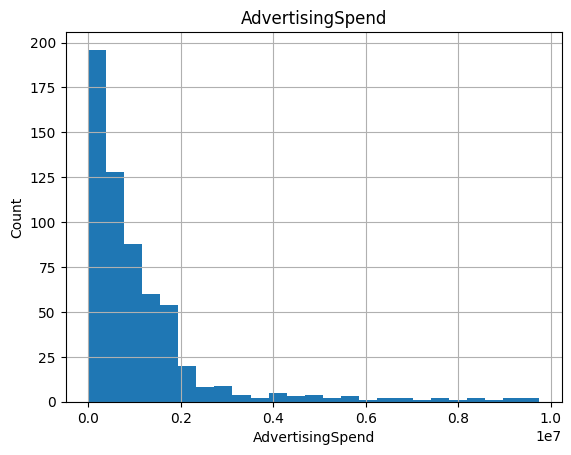

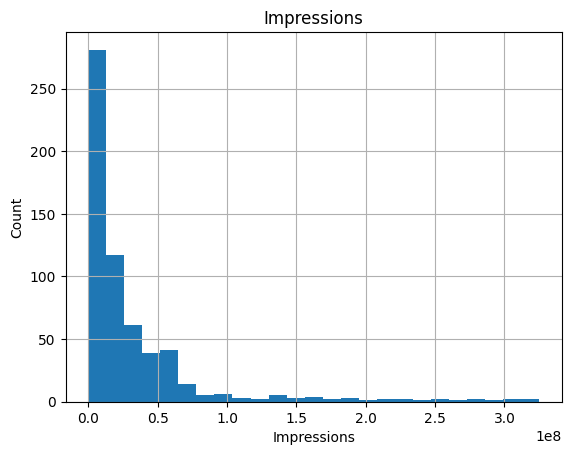

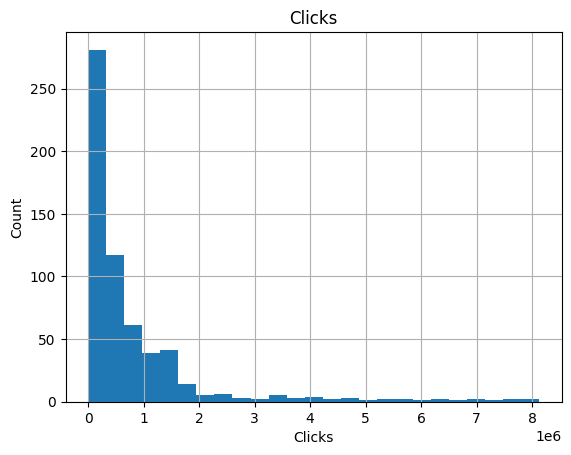

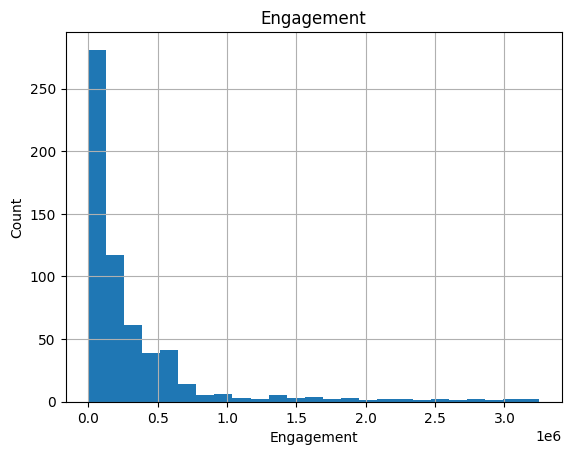

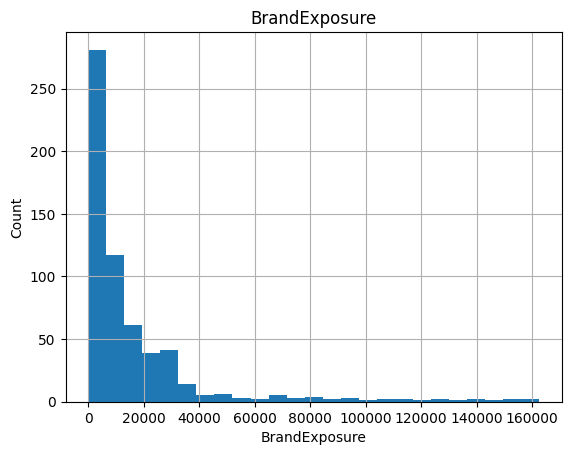

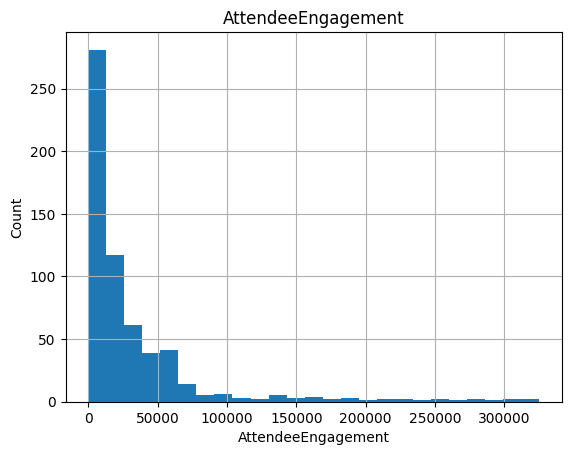

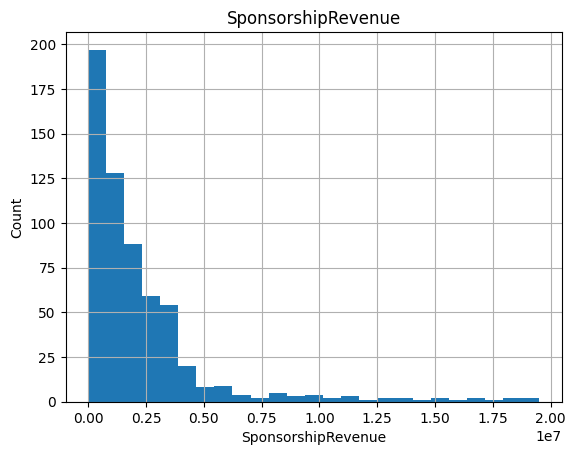

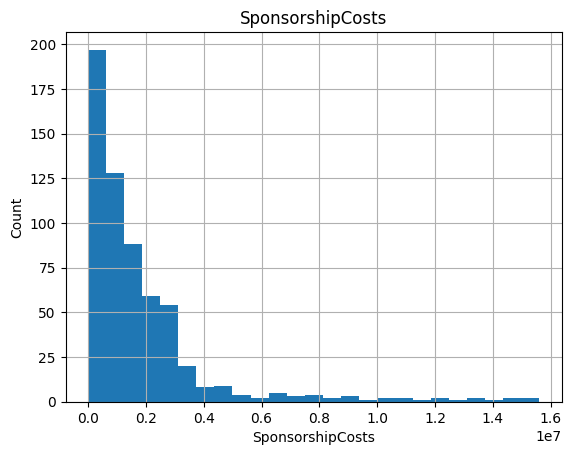

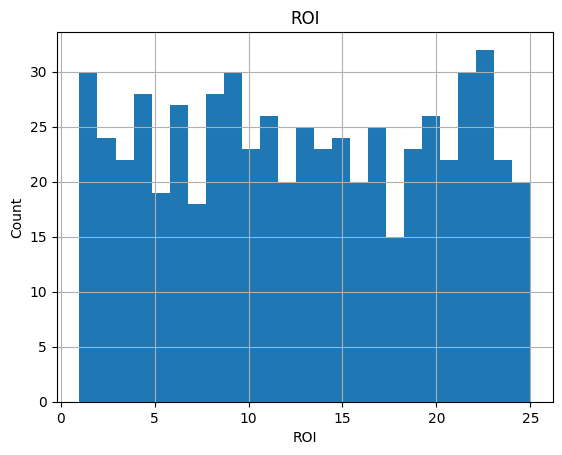

In [9]:
for feature in continuous_feature :
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [10]:
# from dataprep.eda import create_report
# create_report(df).show_browser()

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


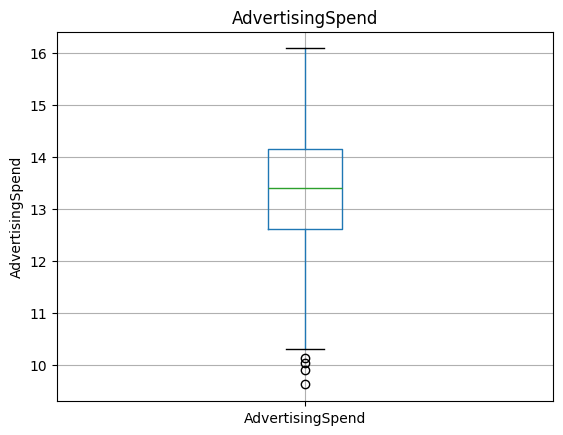

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


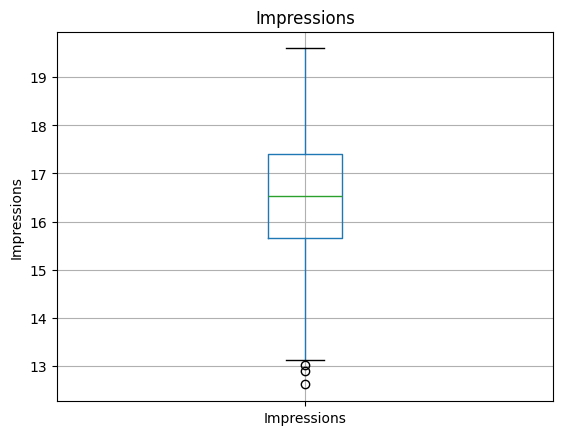

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


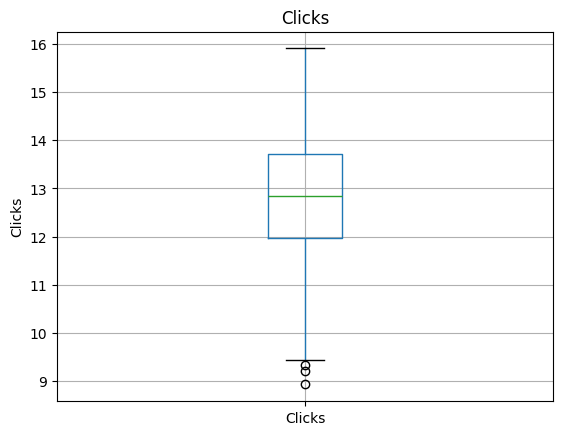

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


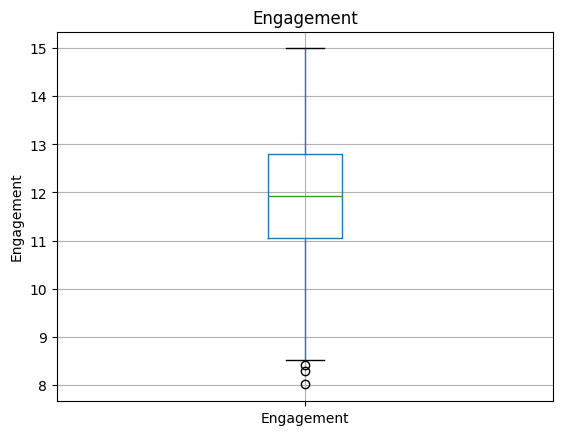

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


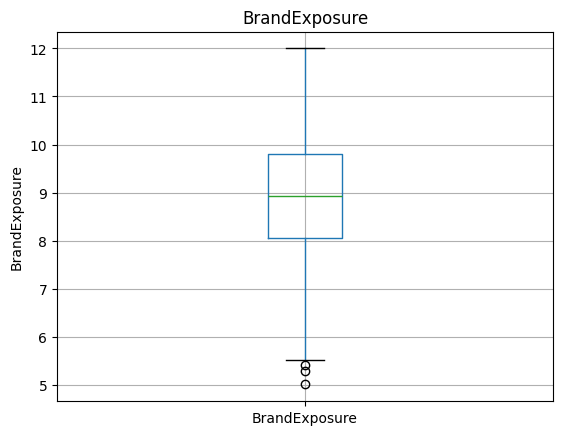

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


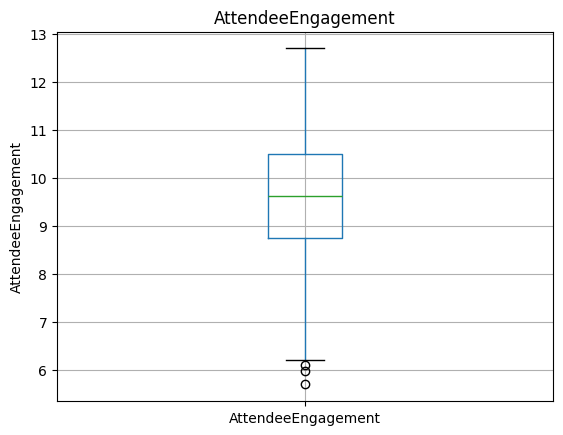

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


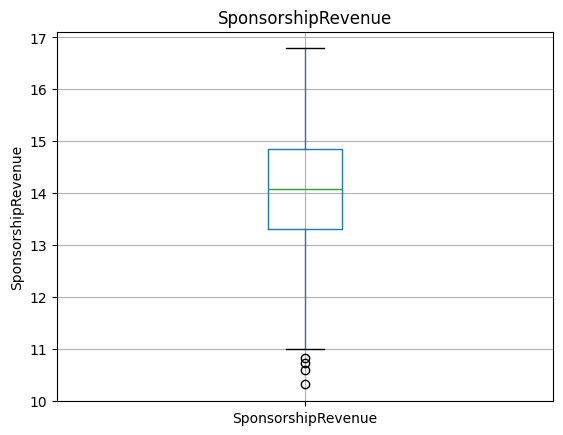

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


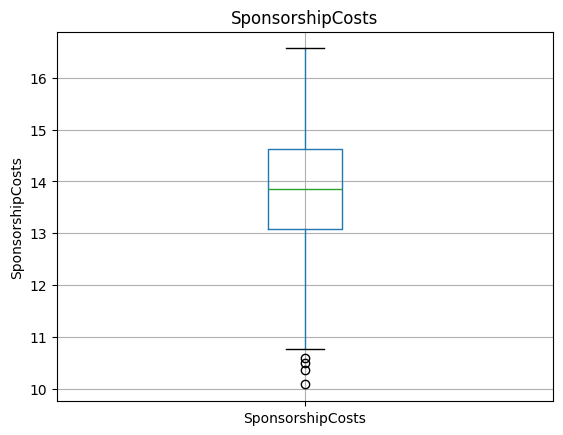

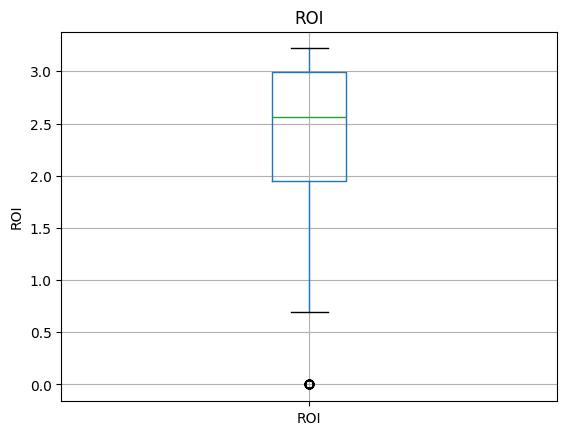

In [11]:
for feature in continuous_feature:
        data=df.copy()
    
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [12]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['SponsorName',
 'SponsorIndustry',
 'SponsorSize',
 'SponsorType',
 'SponsorshipPackageID',
 'SponsorshipPackageName',
 'SponsorshipPackageCost',
 'SponsorshipPackageBenefits',
 'PromotionType',
 'SalesLift']

In [13]:
df[categorical_features].head()


,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageID,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,SalesLift
0,Acme Inc.,Technology,Large,Title,SP1,Platinum,150000,"Branding, Advertising, Hospitality",Social Media,500000
1,Beta Corp.,Finance,Medium,Presenting,SP2,Gold,100000,"Branding, Hospitality",Email,250000
2,Gamma LLC,Retail,Small,Supporting,SP3,Silver,50000,Branding,Print,125000
3,Delta Enterprises,Healthcare,Large,Title,SP4,Platinum,200000,"Branding, Advertising, Hospitality, Workshops",Social Media,750000
4,Epsilon Industries,Manufacturing,Medium,Presenting,SP5,Gold,75000,"Branding, Sampling",Email,187500


In [14]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is SponsorName and number of categories are 352
The feature is SponsorIndustry and number of categories are 9
The feature is SponsorSize and number of categories are 4
The feature is SponsorType and number of categories are 4
The feature is SponsorshipPackageID and number of categories are 600
The feature is SponsorshipPackageName and number of categories are 5
The feature is SponsorshipPackageCost and number of categories are 239
The feature is SponsorshipPackageBenefits and number of categories are 12
The feature is PromotionType and number of categories are 8
The feature is SalesLift and number of categories are 252


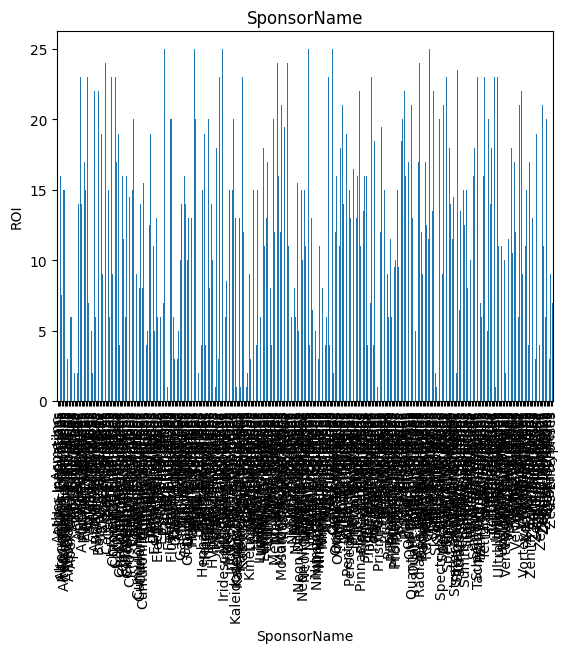

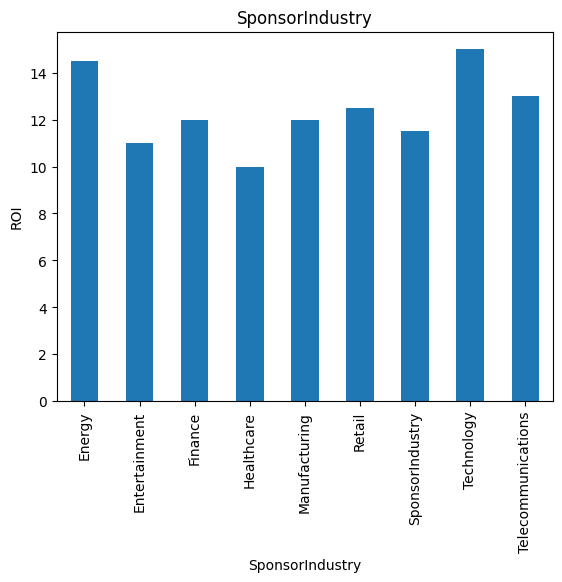

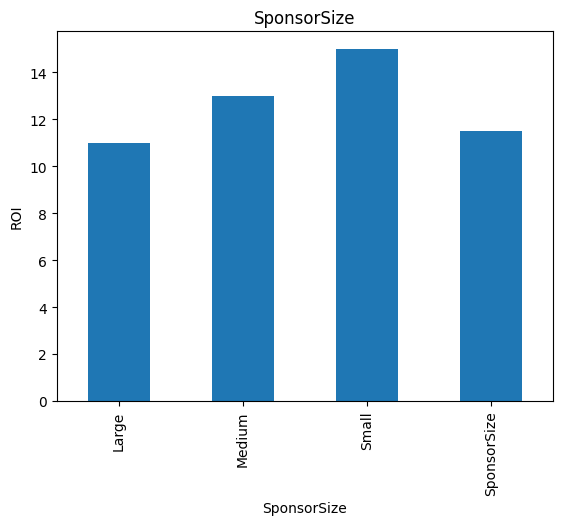

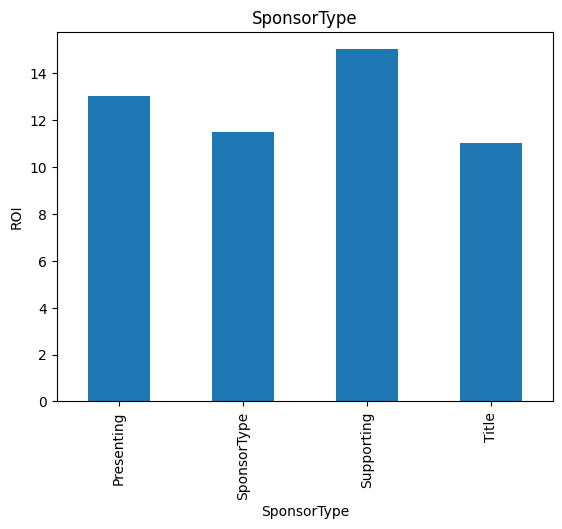

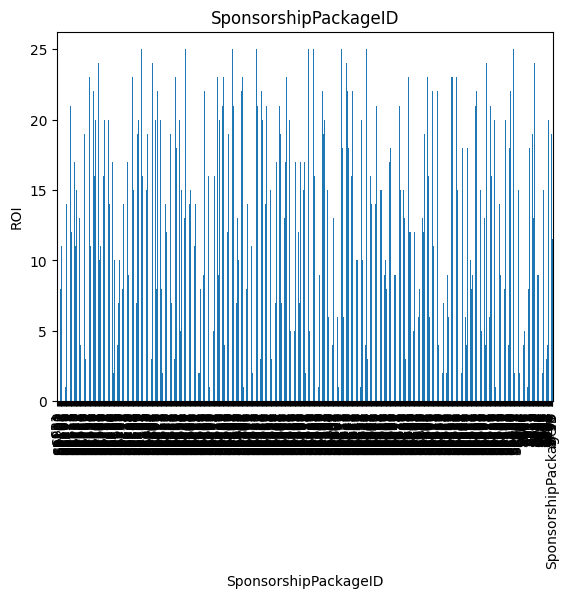

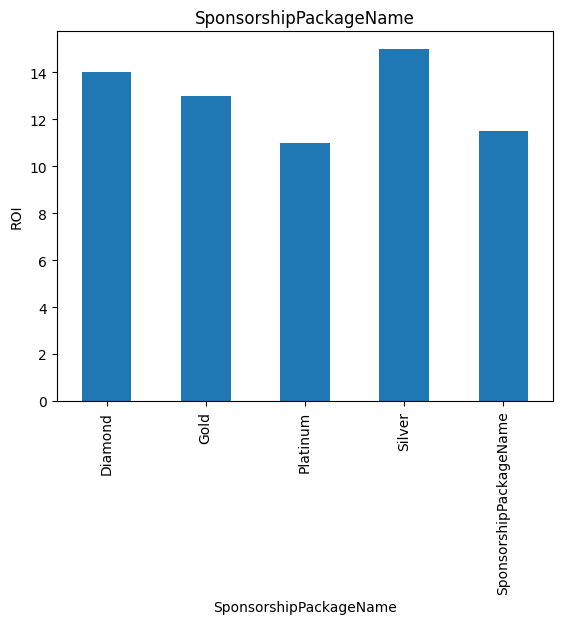

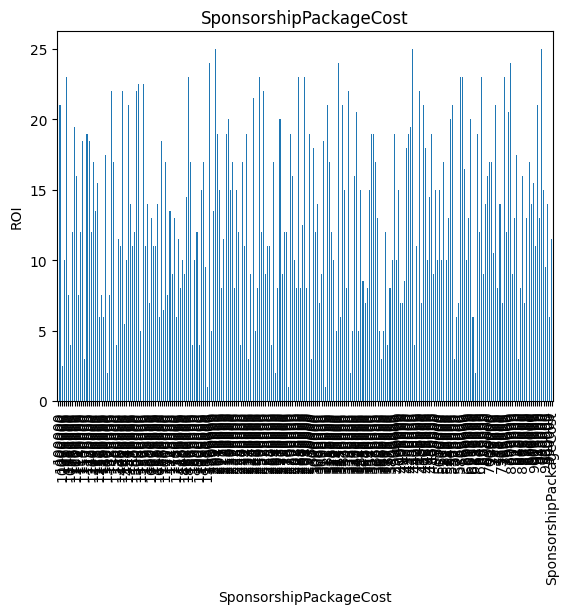

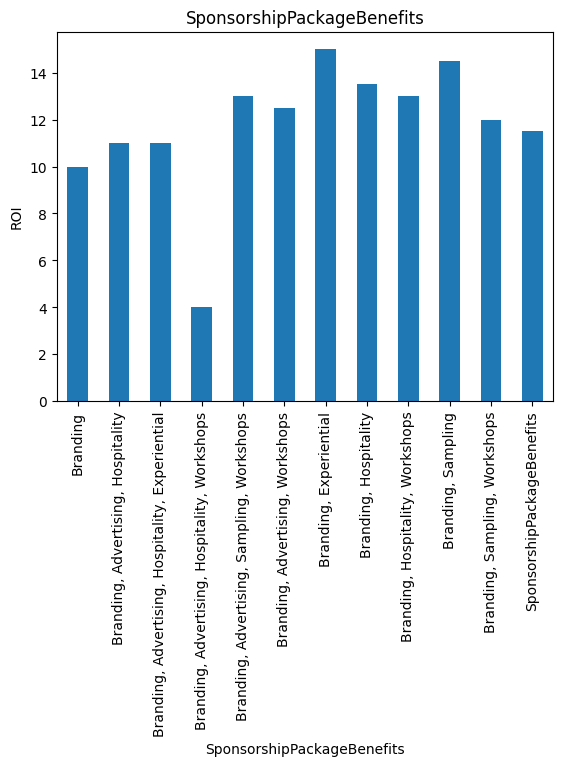

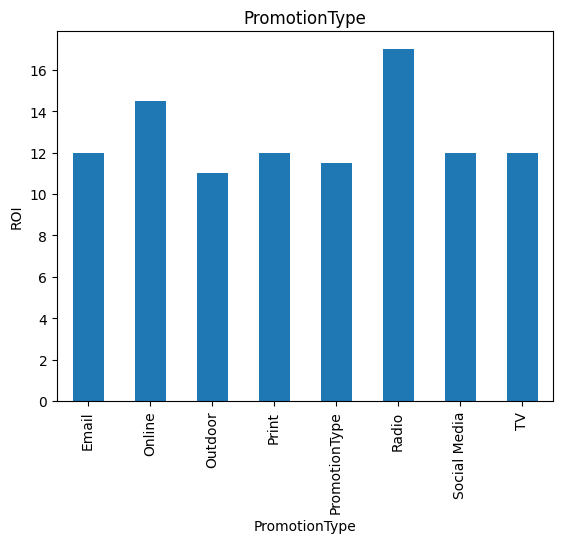

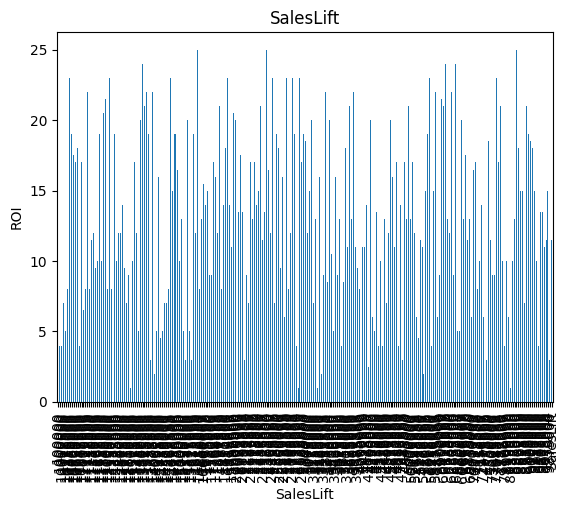

In [15]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['ROI'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('ROI')
    plt.title(feature)
    plt.show()

In [16]:
import pandas as pd

# Assuming your dataset is stored in a variable called 'data'
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                       SponsorID  AdvertisingSpend  Impressions    Clicks  \
SponsorID               1.000000          0.602058     0.513059  0.513059   
AdvertisingSpend        0.602058          1.000000     0.988787  0.988787   
Impressions             0.513059          0.988787     1.000000  1.000000   
Clicks                  0.513059          0.988787     1.000000  1.000000   
Engagement              0.513059          0.988787     1.000000  1.000000   
BrandExposure           0.513059          0.988787     1.000000  1.000000   
AttendeeEngagement      0.513059          0.988787     1.000000  1.000000   
BrandAwarenessMetrics   0.117520          0.461923     0.473234  0.473234   
SponsorshipRevenue      0.600203          0.999400     0.988563  0.988563   
SponsorshipCosts        0.599953          0.999259     0.988465  0.988465   
ROAS                   -0.073234          0.031853     0.032348  0.032348   
ROI                    -0.017167         -0.081450    -0.086772 -0.086772   

C:\Users\Abhyudya Bhatnagar\AppData\Local\Temp\ipykernel_253600\1969319397.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [60]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have a correlation matrix stored in a pandas DataFrame called 'correlation_matrix'
# correlation_matrix = ...

# Create a list of column names
columns = correlation_matrix.columns.tolist()

# Create the heatmap figure
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=columns,
    y=columns,
    colorscale='oranges',
    hovertemplate='Correlation: %{z:.2f}\n X: %{x}\n Y:%{y}<extra></extra>',
))

# Set the axis labels
fig.update_layout(
    width=800,  # Adjust as needed
    height=600,
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
)

# Show the figure
fig.show()


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df['ROI'],test_size=0.2,random_state=0)

In [19]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

In [20]:

numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']



In [21]:

num_features= numerical_features


In [22]:

for feature in num_features:
    df[feature]=np.log(df[feature])
df.head()


c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



,SponsorID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageID,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS,ROI
0,1005,Acme Inc.,Technology,Large,Title,SP1,Platinum,150000,"Branding, Advertising, Hospitality",Social Media,11.225243,14.508658,10.819778,9.903488,6.907755,7.600902,500000,4.499810,11.918391,11.695247,0.693147,3.044522
1,1006,Beta Corp.,Finance,Medium,Presenting,SP2,Gold,100000,"Branding, Hospitality",Email,10.819778,13.815511,10.126631,9.210340,6.214608,6.907755,250000,4.382027,11.512925,11.289782,0.693147,2.944439
2,1007,Gamma LLC,Retail,Small,Supporting,SP3,Silver,50000,Branding,Print,10.126631,13.122363,9.433484,8.517193,5.521461,6.214608,125000,4.248495,10.819778,10.596635,0.693147,2.302585
3,1008,Delta Enterprises,Healthcare,Large,Title,SP4,Platinum,200000,"Branding, Advertising, Hospitality, Workshops",Social Media,11.512925,14.914123,11.225243,10.308953,7.313220,8.006368,750000,4.553877,12.206073,11.982929,0.693147,1.609438
4,1009,Epsilon Industries,Manufacturing,Medium,Presenting,SP5,Gold,75000,"Branding, Sampling",Email,10.532096,13.527828,9.838949,8.922658,5.926926,6.620073,187500,4.317488,11.225243,11.002100,0.693147,3.218876


In [23]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['ROI'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)
df.head()


,SponsorID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageID,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS,ROI
0,1005,302,5,1,1,486,2,85,6,4,11.225243,14.508658,10.819778,9.903488,6.907755,7.600902,229,4.499810,11.918391,11.695247,0.693147,3.044522
1,1006,280,3,2,2,429,3,203,10,2,10.819778,13.815511,10.126631,9.210340,6.214608,6.907755,217,4.382027,11.512925,11.289782,0.693147,2.944439
2,1007,148,4,3,3,237,4,112,5,3,10.126631,13.122363,9.433484,8.517193,5.521461,6.214608,118,4.248495,10.819778,10.596635,0.693147,2.302585
3,1008,57,2,1,1,114,2,26,0,4,11.512925,14.914123,11.225243,10.308953,7.313220,8.006368,107,4.553877,12.206073,11.982929,0.693147,1.609438
4,1009,346,1,2,2,588,3,129,7,2,10.532096,13.527828,9.838949,8.922658,5.926926,6.620073,130,4.317488,11.225243,11.002100,0.693147,3.218876


In [24]:
scaling_feature=[feature for feature in df.columns if feature not in ['SponsorID','ROI', 'SponsorshipPackageID'] ]
len(scaling_feature)


19

In [25]:
scaling_feature
df.head()

,SponsorID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageID,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS,ROI
0,1005,302,5,1,1,486,2,85,6,4,11.225243,14.508658,10.819778,9.903488,6.907755,7.600902,229,4.499810,11.918391,11.695247,0.693147,3.044522
1,1006,280,3,2,2,429,3,203,10,2,10.819778,13.815511,10.126631,9.210340,6.214608,6.907755,217,4.382027,11.512925,11.289782,0.693147,2.944439
2,1007,148,4,3,3,237,4,112,5,3,10.126631,13.122363,9.433484,8.517193,5.521461,6.214608,118,4.248495,10.819778,10.596635,0.693147,2.302585
3,1008,57,2,1,1,114,2,26,0,4,11.512925,14.914123,11.225243,10.308953,7.313220,8.006368,107,4.553877,12.206073,11.982929,0.693147,1.609438
4,1009,346,1,2,2,588,3,129,7,2,10.532096,13.527828,9.838949,8.922658,5.926926,6.620073,130,4.317488,11.225243,11.002100,0.693147,3.218876


In [26]:
feature_scale=[feature for feature in df.columns if feature not in ['SponsorID', 'ROI', 'SponsorshipPackageID']]


In [27]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [28]:
# Remove infinite and extremely large values from the input data
df[feature_scale] = df[feature_scale].replace([np.inf, -np.inf], np.nan)
df[feature_scale] = df[feature_scale].replace([np.finfo(np.float64).max], np.nan)

# Fit the scaler on the cleaned data
scaler.fit(df[feature_scale])


MinMaxScaler()

In [29]:
scaler.transform(df[feature_scale])


array([[0.86039886, 0.625     , 0.33333333, ..., 0.24848615, 0.24848615,
        0.        ],
       [0.7977208 , 0.375     , 0.66666667, ..., 0.18588512, 0.18588512,
        0.        ],
       [0.42165242, 0.5       , 1.        , ..., 0.07886796, 0.07886796,
        0.        ],
       ...,
       [0.002849  , 0.375     , 0.33333333, ..., 1.        , 1.        ,
        0.        ],
       [0.04843305, 0.5       , 0.66666667, ..., 0.82432641, 0.82432641,
        0.        ],
       [0.28205128, 1.        , 1.        , ..., 0.73033094, 0.73033094,
        0.        ]])

In [30]:

data = pd.concat([df[['SponsorID', 'ROI', 'SponsorshipPackageID']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)
data.head()

,SponsorID,ROI,SponsorshipPackageID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS
0,1005,3.044522,486,0.860399,0.625,0.333333,0.333333,0.50,0.357143,0.545455,0.571429,0.248486,0.271490,0.271490,0.271490,0.271490,0.271490,0.912351,0.882343,0.248486,0.248486,0.0
1,1006,2.944439,429,0.797721,0.375,0.666667,0.666667,0.75,0.852941,0.909091,0.285714,0.185885,0.172296,0.172296,0.172296,0.172296,0.172296,0.864542,0.626032,0.185885,0.185885,0.0
2,1007,2.302585,237,0.421652,0.500,1.000000,1.000000,1.00,0.470588,0.454545,0.428571,0.078868,0.073103,0.073103,0.073103,0.073103,0.073103,0.470120,0.335451,0.078868,0.078868,0.0
3,1008,1.609438,114,0.162393,0.250,0.333333,0.333333,0.50,0.109244,0.000000,0.571429,0.292902,0.329515,0.329515,0.329515,0.329515,0.329515,0.426295,1.000000,0.292902,0.292902,0.0
4,1009,3.218876,588,0.985755,0.125,0.666667,0.666667,0.75,0.542017,0.636364,0.285714,0.141469,0.131127,0.131127,0.131127,0.131127,0.131127,0.517928,0.485588,0.141469,0.141469,0.0


In [31]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [32]:

y_train=data[['ROI']]

X_train=data.drop(['SponsorID', 'ROI', 'SponsorshipPackageID'],axis=1)


In [33]:
X_train.isna().sum()

SponsorName                   0
SponsorIndustry               0
SponsorSize                   0
SponsorType                   0
SponsorshipPackageName        0
SponsorshipPackageCost        0
SponsorshipPackageBenefits    0
PromotionType                 0
AdvertisingSpend              2
Impressions                   2
Clicks                        2
Engagement                    2
BrandExposure                 2
AttendeeEngagement            2
SalesLift                     0
BrandAwarenessMetrics         2
SponsorshipRevenue            2
SponsorshipCosts              3
ROAS                          3
dtype: int64

In [48]:
import pandas as pd
# Replace NaN values with medians
X_train_filled = X_train.fillna(X_train.median())

# Verify the changes
print(X_train_filled.head())


   SponsorName  SponsorIndustry  SponsorshipPackageCost  \
0     0.860399            0.625                0.357143   
1     0.797721            0.375                0.852941   
2     0.421652            0.500                0.470588   
3     0.162393            0.250                0.109244   
4     0.985755            0.125                0.542017   

   SponsorshipPackageBenefits  Impressions  SalesLift  
0                    0.545455     0.271490   0.912351  
1                    0.909091     0.172296   0.864542  
2                    0.454545     0.073103   0.470120  
3                    0.000000     0.329515   0.426295  
4                    0.636364     0.131127   0.517928  


In [37]:

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [38]:
feature_sel_model.get_support()


array([ True,  True, False, False, False,  True,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
       False])

In [39]:
# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]


In [40]:

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 19
selected features: 6


In [41]:

selected_feat


Index(['SponsorName', 'SponsorIndustry', 'SponsorshipPackageCost',
       'SponsorshipPackageBenefits', 'Impressions', 'SalesLift'],
      dtype='object')

In [42]:

X_train=X_train[selected_feat]


In [43]:

X_train.head()


,SponsorName,SponsorIndustry,SponsorshipPackageCost,SponsorshipPackageBenefits,Impressions,SalesLift
0,0.860399,0.625,0.357143,0.545455,0.271490,0.912351
1,0.797721,0.375,0.852941,0.909091,0.172296,0.864542
2,0.421652,0.500,0.470588,0.454545,0.073103,0.470120
3,0.162393,0.250,0.109244,0.000000,0.329515,0.426295
4,0.985755,0.125,0.542017,0.636364,0.131127,0.517928


In [44]:
def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

X_test=replace_cat_feature(X_test,features_nan)

X_test[features_nan].isnull().sum()
X_test.head()

numerical_with_nan=[feature for feature in X_test.columns if X_test[feature].isnull().sum()>1 and X_test[feature].dtypes!='O']



for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(X_test[feature].isnull().mean(),4)))
import numpy as np


for feature in num_features:
    X_test[feature]=np.log(X_test[feature])
X_test.head()
for feature in categorical_features:
    labels_ordered=X_test.groupby([feature])['ROI'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    X_test[feature]=X_test[feature].map(labels_ordered)
X_test.head()
scaling_feature=[feature for feature in X_test.columns if feature not in ['SponsorID','ROI', 'SponsorshipPackageID'] ]
len(scaling_feature)
scaling_feature

X_test.head()
feature_scale=[feature for feature in X_test.columns if feature not in ['SponsorID', 'ROI', 'SponsorshipPackageID']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_test[feature_scale])
scaler.transform(X_test[feature_scale])

tdata = pd.concat([X_test[['SponsorID', 'ROI', 'SponsorshipPackageID']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[feature_scale]), columns=feature_scale)],
                    axis=1)
tdata.head()

,SponsorID,ROI,SponsorshipPackageID,SponsorName,SponsorIndustry,SponsorSize,SponsorType,SponsorshipPackageName,SponsorshipPackageCost,SponsorshipPackageBenefits,PromotionType,AdvertisingSpend,Impressions,Clicks,Engagement,BrandExposure,AttendeeEngagement,SalesLift,BrandAwarenessMetrics,SponsorshipRevenue,SponsorshipCosts,ROAS
0,1277,3.135494,104,0.882353,0.666667,0.0,0.0,0.333333,0.895833,0.125,0.000000,0.689287,0.712976,0.712976,0.712976,0.712976,0.712976,0.905263,0.882343,0.689287,0.689287,0.0
1,1057,2.197225,44,0.196078,0.000000,0.5,0.5,0.666667,0.572917,0.000,0.166667,0.255945,0.236432,0.236432,0.236432,0.236432,0.236432,0.536842,0.626032,0.255945,0.255945,0.0
2,1483,1.791759,29,0.245098,0.000000,0.0,0.0,0.000000,0.177083,0.125,0.000000,0.814863,0.828978,0.828978,0.828978,0.828979,0.828978,0.221053,1.000000,0.814863,0.814863,0.0
3,1199,1.609438,21,0.176471,0.333333,1.0,1.0,1.000000,0.260417,0.625,0.333333,0.415963,0.384250,0.384250,0.384250,0.384250,0.384250,0.284211,0.335451,0.415963,0.415963,0.0
4,1350,2.833213,79,0.666667,0.833333,1.0,1.0,1.000000,0.718750,0.875,1.000000,0.500333,0.462187,0.462187,0.462187,0.462187,0.462187,0.652632,0.174183,0.500333,0.500333,0.0


In [45]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [46]:
tdata = tdata[['SponsorName', 'SponsorshipPackageCost', 'SponsorshipPackageBenefits',
       'SalesLift']]
tdata.head()

,SponsorName,SponsorshipPackageCost,SponsorshipPackageBenefits,SalesLift
0,0.882353,0.895833,0.125,0.905263
1,0.196078,0.572917,0.000,0.536842
2,0.245098,0.177083,0.125,0.221053
3,0.176471,0.260417,0.625,0.284211
4,0.666667,0.718750,0.875,0.652632


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


lr = LinearRegression()
rf = RandomForestRegressor()

models = [lr, rf]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print(type(model).__name__)
    print('MAE: ', mean_absolute_error(y_train, y_pred))
    print('MSE: ', mean_squared_error(y_train, y_pred))
    print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))
    print('-------------------')


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
print('Linear Regression MAE: ', mean_absolute_error(y_train, y_pred))
print('Linear Regression MSE: ', mean_squared_error(y_train, y_pred))
print('Linear Regression RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))



rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
print('Random Forest Regressor MAE: ', mean_absolute_error(y_train, y_pred))
print('Random Forest Regressor MSE: ', mean_squared_error(y_train, y_pred))
print('Random Forest Regressor RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

LinearRegression
MAE:  0.39240872487723566
MSE:  0.27419793572573753
RMSE:  0.5236391273823391
-------------------
RandomForestRegressor
MAE:  0.11805513782880923
MSE:  0.03650787803394144
RMSE:  0.1910703483901713
-------------------
Linear Regression MAE:  0.39240872487723566
Linear Regression MSE:  0.27419793572573753
Linear Regression RMSE:  0.5236391273823391


c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Abhyudya Bhatnagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest Regressor MAE:  0.11918846570302892
Random Forest Regressor MSE:  0.03744048771491811
Random Forest Regressor RMSE:  0.19349544623819476


In [ ]:
import pickle as pkl

pkl.dump(lr, open('model4.pkl', 'wb'))